# Importando Pacotes

In [1]:
import os

In [2]:
os.chdir('../')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from summarytools import dfSummary
from distfit import distfit
from scipy.stats import gamma, kstest

In [4]:
pd.set_option('display.max_columns', 500)

# Leitura dos dados

In [5]:
listings = pd.read_parquet('data/silver/listings.parquet')

# Preparação dos dados

In [6]:
listings = listings.dropna(subset=['price']).reset_index(drop=True)

In [7]:
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [8]:
listings = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)].reset_index(drop=True)

In [9]:
listings = listings.drop(columns=[
    'id', 'host_id', 'number_of_reviews_ltm',
    'number_of_reviews_l30d',  'calculated_host_listings_count', 'comments', 
    'price_range', 'host_listings_count_range', 'host_years_active_range',
    'last_review', 'sentiment', 'first_review'
])

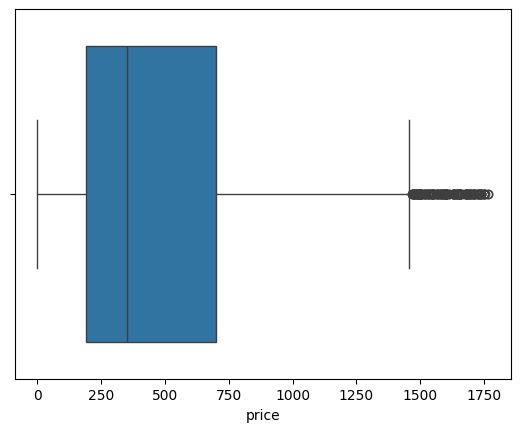

In [10]:
sns.boxplot(x = listings['price']);

In [11]:
dfit = distfit(alpha=.05, distr='popular', random_state = 42, verbose = False)
dfit.fit_transform(listings['price'], verbose = False)

{'model': {'name': 'gamma',
  'score': 6.421153132277646e-06,
  'loc': 0.7583211027512493,
  'scale': 258.9770601590149,
  'arg': (1.9483673790160294,),
  'params': (1.9483673790160294, 0.7583211027512493, 258.9770601590149),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x21e79717d10>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 87.47707511380226,
  'CII_max_alpha': 1207.566270959766},
 'summary':           name     score             loc                scale  \
 0        gamma  0.000006        0.758321            258.97706   
 1         beta  0.000006        0.703432  6580349130378.44043   
 2     dweibull   0.00001      391.675354           309.399206   
 3       pareto   0.00001 -137438953471.0  137438953471.999985   
 4        expon   0.00001             1.0           504.340824   
 5            t  0.000012      502.735067           388.673802   
 6     loggamma  0.000012  -141215.699727         18537.483577   


O valor do **p-value** é significativamente menor que 0.05.

É rejeitado a hipótese nula, que seria de que os dados de `price` seguem uma distribuição gama.

In [21]:
ks_statistic, p_value = kstest(listings['price'], 'gamma', args=dfit.model['params'])

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.10864041751627856
P-value: 4.350913367707392e-58


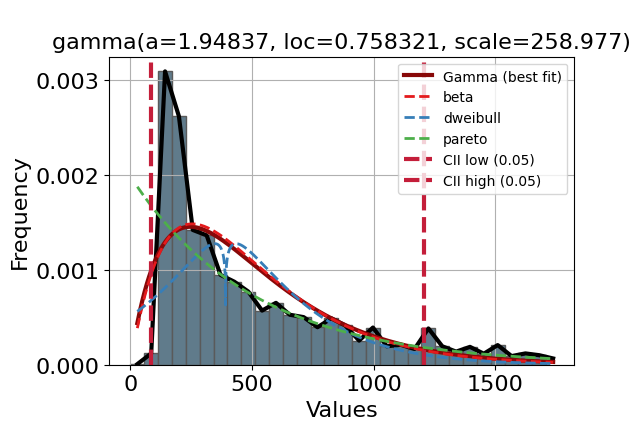

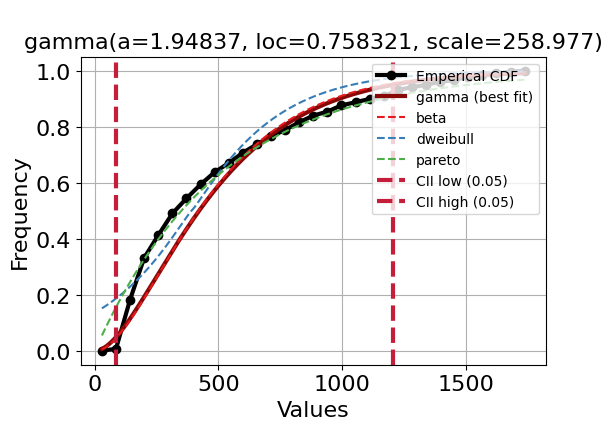

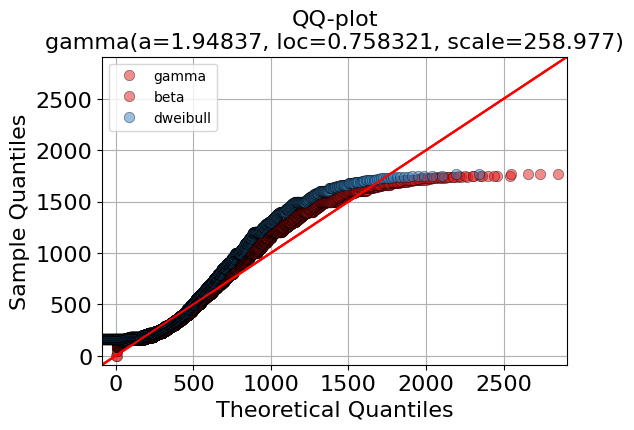

In [13]:
number_top_distribution = 3
fig, ax = dfit.plot(chart='pdf', n_top=number_top_distribution, figsize = (6, 4))
fig, ax = dfit.plot(chart='cdf', n_top=number_top_distribution, figsize = (6, 4))
fig, ax = dfit.qqplot(listings['price'], n_top=3, figsize = (6, 4))

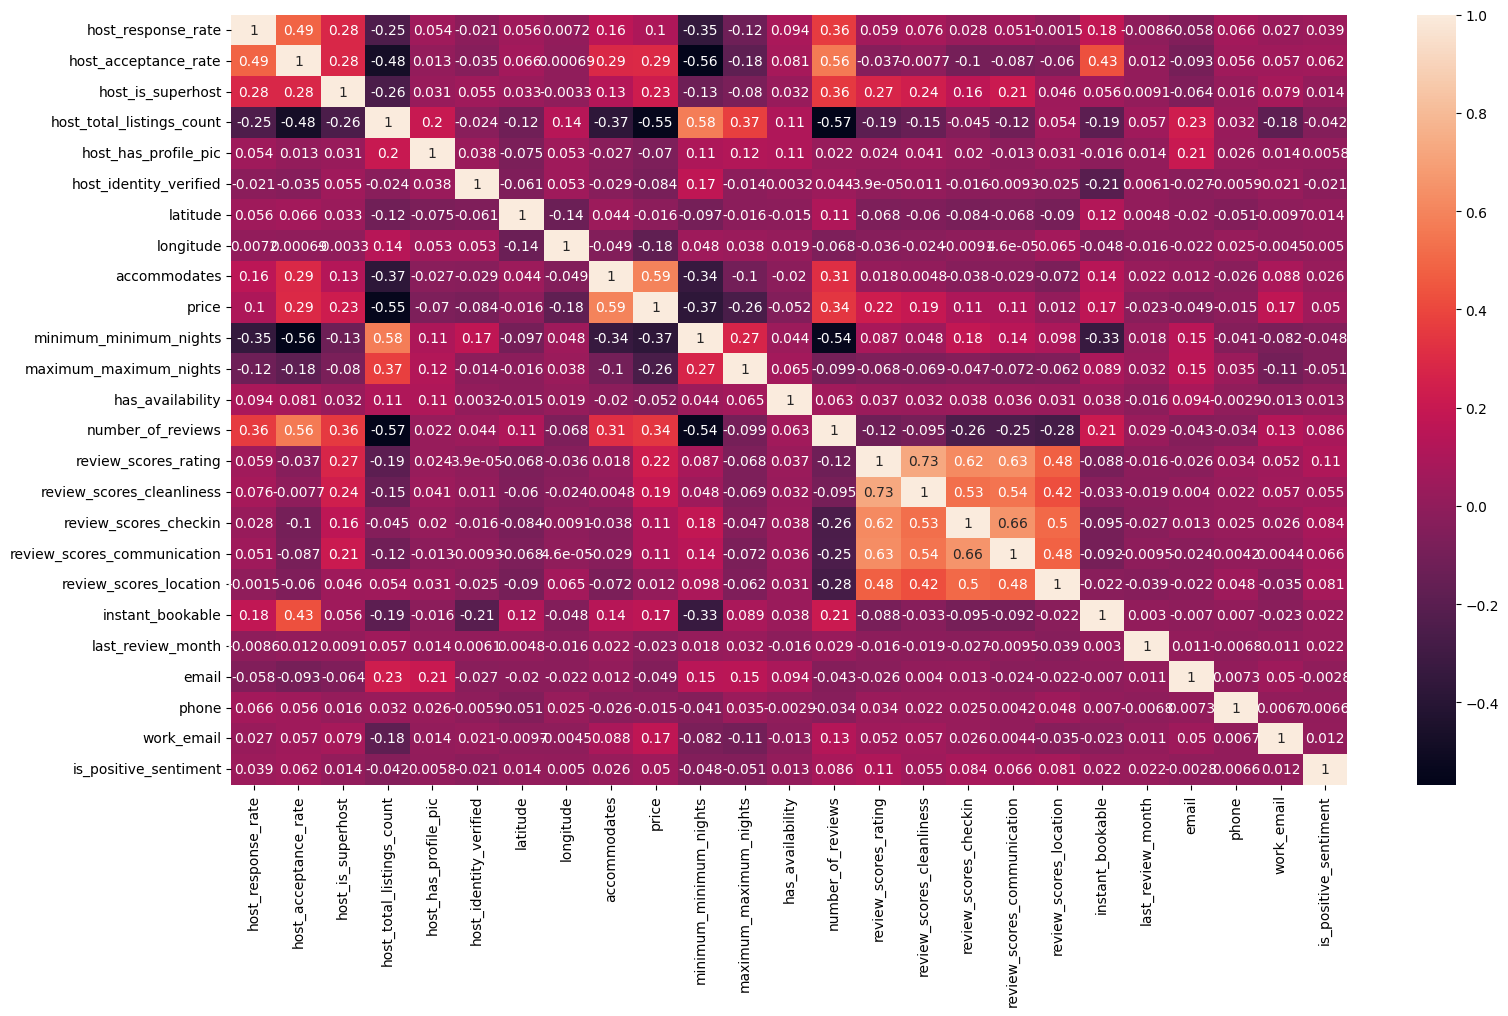

In [14]:
plt.figure(figsize = (18, 10))
sns.heatmap(listings.corr(numeric_only=True, method = 'spearman'), annot = True);